In [3]:
'''Numerical Recipes for astrophysics first hand-in exercise. '''

'Numerical Recipes for astrophysics first hand-in exercise. '

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys

seed = 42
print('Seed value used:',seed)

Seed value used: 42


In [59]:
# Functions for first task.
def poisson_distribution(mean,k):
# Returns probability for given k and mean
    fact = np.float64(1) 
    for i in range(round(k)):
        fact = round(fact*(k-i),6) # MAKE A FIX FOR LARGE NUMBERS
        
    print('Factorial:',fact)
    if fact >= sys.maxsize:
        print('Factorial exceeds float max:',fact)
        return
    return (mean**(k)*np.exp(-mean))/fact
#end poisson_distribution

def LCG_gen(x):
# Linear Congruenial generator
    a,c,m = 2**32,1664525,1013904223
    return np.int64((a*x+c)%m)
#end LCG_gen

def XOR_shift(x):
# XOR-shift generator
    a1,a2,a3 = 21,35,4
    x = x ^ x >> a1
    x = x ^ x << a2 
    x = x ^ x >> a3 
    return x
#end XOR_shift

def rand_num(l,seed,min=0,max=1):
# Combination of XOR_shift and LCG_gen
    x = list([np.int64(seed)])
    for i in range(l):
        x[i] = LCG_gen(x[i])
        x[i] = XOR_shift(x[i])
        x[i] = LCG_gen(x[i])
        x[i] = XOR_shift(x[i])
        x[i] = XOR_shift(x[i])
        x.append(x[i])
    x = np.array(x)/sys.maxsize
    return min+(x[:-1]*(max-min))
# MAKE CLASS

In [132]:
# Poisson distribution
a1 = [[1,0],[5,10],[3,20],[2.6,40],[101,200]]
for i in range(len(a1)):
    print(poisson_distribution(a1[i][0],a1[i][1]))



Factorial: 1.0
0.36787944117144233
Factorial: 3628800.0
0.01813278870782187
Factorial: 2.4329020081766405e+18
7.135378768777134e-11
Factorial: 8.159152832478977e+47
Factorial exceeds float max: 8.159152832478977e+47
None
Factorial: inf
Factorial exceeds float max: inf
None


/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


In [11]:
fact = 1
for i in range(round(40)):
        fact = fact*(40-i)
print(fact)
print(sys.maxsize)
print(2**64)

815915283247897734345611269596115894272000000000
9223372036854775807
18446744073709551616


/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in long_scalars


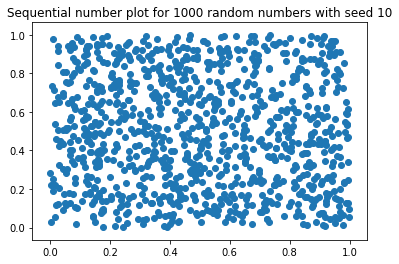

1000


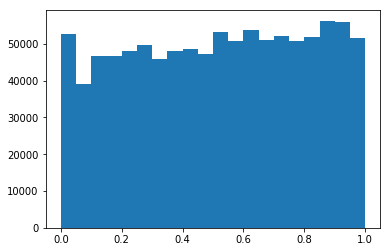

In [62]:
rand = rand_num(1000,seed)
plt.scatter(rand[:(len(rand)-1)],rand[1:])
plt.title('Sequential number plot for {} random numbers with seed {}'.format(1000,seed))
plt.show()
rand = rand_num(1000000,seed)
plt.hist(rand,bins=20,range=(0,1))
plt.show()

In [43]:
'''TASK NUMBER 2'''

'TASK NUMBER 2'

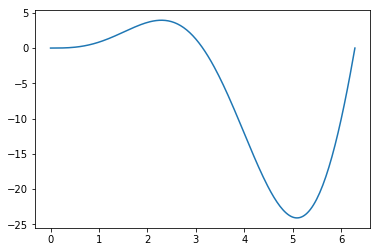

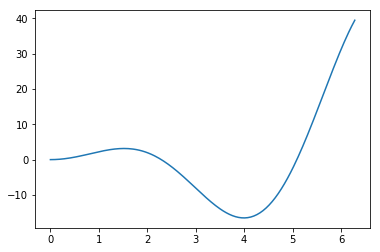

-155.97304666420328


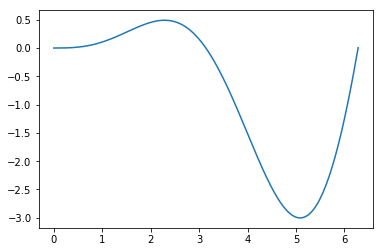

In [80]:
# Functions used for differentiation
def central_diff(f,h,x):
# Calculates the central difference
    return (f(x+h)-f(x-h))/(2*h) 
#end central_diff()

def ridders_differentiator(f,h,x,m):
# Differentiates using Ridder's method
    def D_calc(i,j,d,D,D_new):
    # Calculates D
        return (d**(2*(j+1)) * D[j-1] - D_new[j-1]) / (d**(2*(j+1))- 1)
    #end D_calc()
    D = np.zeros((m,200))
    d = 2
    for i in range(m):
        D_new = D      
        for j in range(i+1):    
            if j == 0:
                D_new[j] = central_diff(f,h,x)
            else:
                D_new[j] = D_calc(i,j,d,D,D_new)  
        D = D_new    
        h = h/d         
    return D[m-1]
    # Could still look into iterating until a certain accuracy is reached                                                      
#end ridders_differentiator()

def trapezoid(f,h,x):
# Calculates the central difference
    return h*(f(x+h)+f(x-h)) 
#end central_diff()
                                                       
def rombergs_integrator(f,h,x,m):
# Integrates using the romberg technique   
    def S_calc(i,j,d,S,S_new):
    #Calculates S
        return (4**(j+1) * S[j-1]) - S_new[j-1] / (4**(j+1)- 1)
    #end D_calc()
    S = np.zeros((m,200))
    d = 2
    n = 1
    for i in range(m):
        n *= 2
        S_new = S      
        for j in range(i+1):    
            if j == 0:
                S_new[j] = trapezoid(f,h,x)
            else:
                S_new[j] = S_calc(i,j,d,S,S_new)  
        S = S_new    
        h = 1/n 
    return S[m-1]
#end rombergs_integrator()

x = np.linspace(0,2*np.pi,200)

plt.plot(x,x**2*np.sin(x))
plt.show()
    
D = ridders_differentiator(lambda x:x**2*np.sin(x),0.001,x,5)

plt.plot(x,D)
plt.show()
                                                       
S = rombergs_integrator(lambda x:x**2*np.sin(x),1,x,5)
print(sum(S))
plt.plot(x,S)
plt.show()
                                                       
#Functions used for integration


In [64]:
# 2a 
seed = 42
# Randomly generate a,b,c
a,b,c = rand_num(1,seed,1.1,2.5),rand_num(1,seed,0.5,2),rand_num(1,seed,1.5,4)
# The integral can be rewritten as:
def f():
    return 4*np.pi*pow(x,a-1)*pow(3-a)*np.exp(-1*pow(x/b,c))



/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in long_scalars
